In [13]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf #can specify in formula like format - requires dataframe as input
import statsmodels.api as sm #can take numpy arrays as well; easier to use predict function
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold


### Question 6

In [4]:
wage = pd.read_csv('/home/harsh/Desktop/ISLR/dataset/Wage.csv')
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/home/harsh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


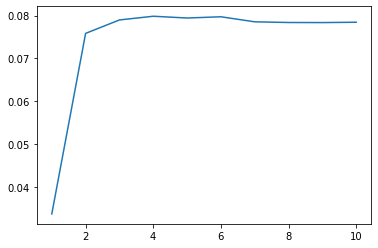

In [26]:
# (a)
df = wage.copy()
x = df['age']
y = df['wage']

#transforming data to include another axis
x = x[:,np.newaxis]
y = y[:,np.newaxis]

score = []
for d in range(1,11):
    pr = PolynomialFeatures(degree=d)
    x_poly = pr.fit_transform(x) #transforms x into [1,x,x2...]
    reg = LinearRegression()
    results_cv = model_selection.cross_validate(reg, x_poly, y, scoring='r2', cv=10)
    score.append(results_cv['test_score'].mean())

plt.plot(range(1,11), score)

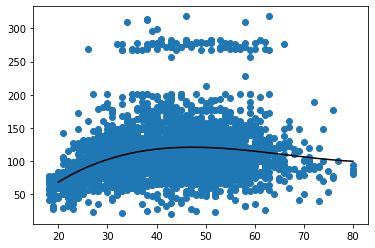

In [39]:
#Looks like degree 3 polynomial performs relatively best; should be noted that overall R2 value is very low.
d = 3
pr = PolynomialFeatures(degree=d)
x_poly = pr.fit_transform(x)
reg = LinearRegression().fit(x_poly, y)
plt.scatter(x, y)
a = np.linspace(20,80,1000).reshape(-1,1)
a_ = pr.fit_transform(a)
plt.plot(a, reg.predict(a_), color='k')

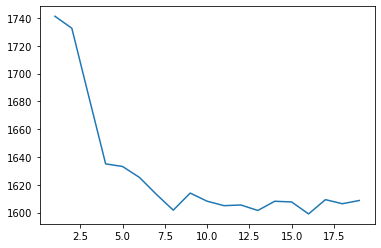

In [44]:
# (b)
y = wage['wage']
x = wage['age']
score = []
cuts = range(1,20)
for c in cuts:
    x_new = pd.get_dummies(pd.cut(x, c))
    
    clf = LinearRegression(fit_intercept=False)
    
    scr = model_selection.cross_val_score(clf, x_new, y, scoring='neg_mean_squared_error')
    score.append(-np.mean(scr))

plt.plot(cuts, score)

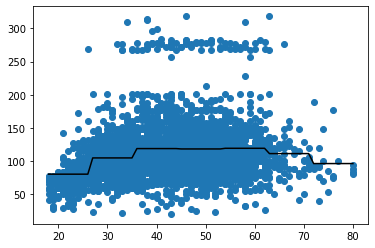

In [42]:
# 7 or 8 cuts should be the best option.
x_new = pd.get_dummies(pd.cut(x, 7)).values
clf = LinearRegression(fit_intercept=False).fit(x_new, y)
plt.scatter(x, y)
order=np.argsort(x)
plt.plot(x.values[order], clf.predict(x_new[order]), color='k')